##### 1. 用一次多项式拟合下列数据

In [1]:
import numpy as np, matplotlib.pyplot as plt

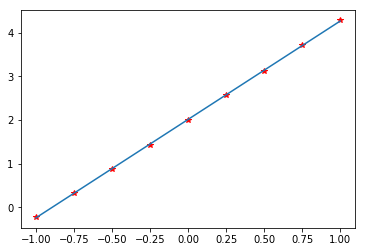

In [2]:
x = np.arange(-1,1.25,0.25)
y = np.array([-0.2209, 0.3295, 0.8826, 1.4393, 2.0003, 2.5645, 3.1334, 3.7061, 4.2836])
plt.plot(x,y,'r*')
P = np.polyfit(x,y,1)
y1 = np.polyval(P,x)
plt.plot(x,y1)

##### 2. 用二次多项式拟合下列数据

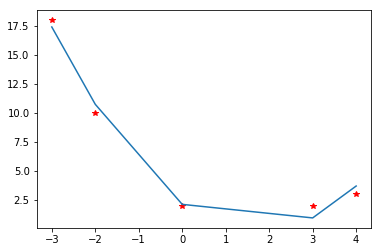

In [4]:
x = np.array([-3,-2,0,3,4])
y = np.array([18, 10, 2, 2, 3])
plt.plot(x,y,'r*')
P = np.polyfit(x,y,2)
y1 = np.polyval(P,x)
plt.plot(x,y1)

##### 3. 
令$x=-0.2:0.1:1$, $y=2x^5-3x^3-x^2-9$, 利用产生的数据作多项式拟合，
        看看结果如何。如果对这些作保形内插法拟合，比较两条拟合曲线。注意在多项式拟合时会得到多项式的数学
        表达式，而保形拟合不产生数学表达式。再保持$x$不变，在原来的$y$值加上随机偏差0.1*rand(13), 再做
        一次多项式拟合和保形拟合，看看效果有什么不同？

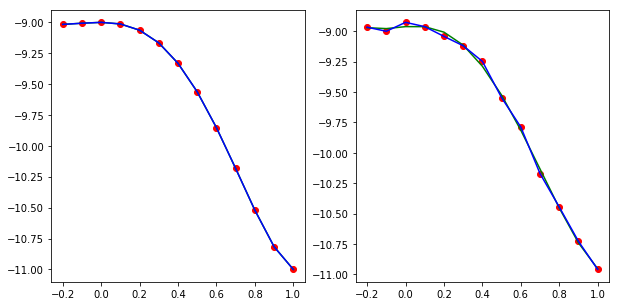

In [13]:
x=np.arange(-0.2,1.1,0.1)
y = 2*x**5-3*x**3-x**2-9
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y,'ro')
P = np.polyfit(x,y,5)
y1 = np.polyval(P,x)
plt.plot(x,y1,'g')
from scipy.interpolate import interp1d
f = interp1d(x,y)
y2 = f(x)
plt.plot(x, y2, 'b')

#加上误差的效果
plt.subplot(1,2,2)
y = y + 0.1*np.random.rand(13)
plt.plot(x, y, 'ro')
P = np.polyfit(x,y,5)
y1 = np.polyval(P,x)
plt.plot(x,y1,'g')
f = interp1d(x,y)
y2 = f(x)
plt.plot(x, y2, 'b')

##### 4. 
已知方形波数据为

$x=0:0.1:2$,

$y= [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]$
       
分别用曲线拟合中8个不同的傅里叶级数去拟合它们，看看结果如何。再用保形内插法对它拟合，结果又是如何。最后用快速傅里叶变换和反变换的指令对这组数据做运算，并画出图形，再看看结果如何。


In [21]:
from scipy.optimize import curve_fit
def Fourier(x, a0, a, b):
    s = a0
    w = 1
    for k in range(1,9):
        s += a[k-1]*np.cos(k*x*w) + b[k-1]*np.sin(k*x*w)
    return s
x = np.ogrid[0:2.1:0.1]
y = np.array([0.,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
pars, pcov = curve_fit(Fourier, x, y)

IndexError: invalid index to scalar variable.

array([0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])